### Statistical Inference - Power

#### Recap

Notice that, until now, we have framed hypothesis testing only in terms of the null hypothesis and significance level. 
  - We defined the alternative hypothesis as the complement of the null hypothesis. *i.e.* anything in the **rejection region**.

This made it very easy to calculate the probability of a Type I error 
  >rejecting the null hypothesis when the null hypothesis is indeed TRUE.

But it made it impossible to calculate the probability of a Type II error. 
  >Remember that the probability of a Type II error is the probability of failing to reject the null hypothesis when the null hypothesis is indeed FALSE.

This is because we have not defined the alternative hypothesis.

Indeed, we can only calculate the probability of a Type II error if also define the alternative hypothesis.

So, what is power?

#### Power - Extending Hypothesis Testing

Power is the probability of rejecting the null hypothesis when the null hypothesis is indeed FALSE. In other words, power is the probability of correctly rejecting the null hypothesis. 

Power is calculated as 1 - the probability of a Type II error.


Left boundary: -1.64
Right boundary: 1.64


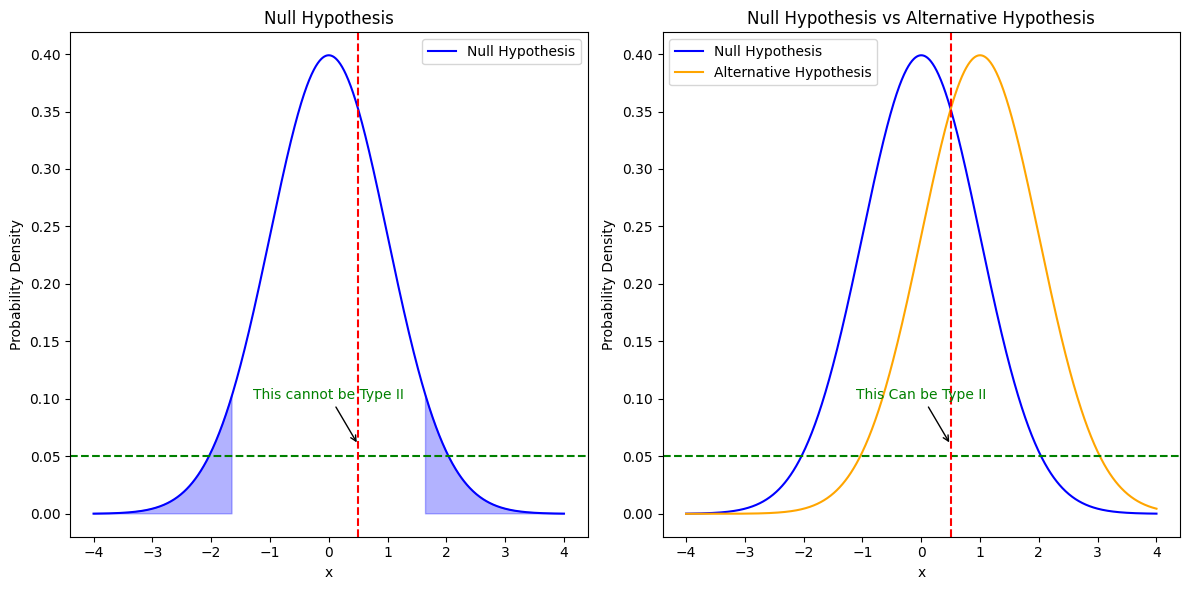

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate data for the normal distributions
x = np.linspace(-4, 4, 1000)
mu1 = 0
sigma1 = 1
mu2 = 1
sigma2 = 1

# Calculate the boundaries for the left subplot
boundary = 1.64
left_boundary = mu1 - sigma1 * boundary
right_boundary = mu1 + sigma1 * boundary

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

print('Left boundary: {:.2f}'.format(left_boundary))
print('Right boundary: {:.2f}'.format(right_boundary))
# Plot the left subplot
ax1.plot(x, stats.norm.pdf(x, mu1, sigma1), color='blue', label='Null Hypothesis')
ax1.fill_between(x, stats.norm.pdf(x, mu1, sigma1), where=(x <= left_boundary) | (x >= right_boundary), color='blue', alpha=0.3)
ax1.axhline(0.05, color='green', linestyle='--')
# add vertical line inside boundary
ax1.axvline(0.5, color='red', linestyle='--')
ax1.annotate('This cannot be Type II', xy=(0.5, 0.06), xytext=(0, 0.1),
             arrowprops=dict(facecolor='green', arrowstyle='->'), color='green', ha='center')
ax1.set_xlabel('x')
ax1.set_ylabel('Probability Density')
ax1.set_title('Null Hypothesis')

# Plot the right subplot
ax2.plot(x, stats.norm.pdf(x, mu1, sigma1), color='blue', label='Null Hypothesis')
ax2.plot(x, stats.norm.pdf(x, mu2, sigma2), color='orange', label='Alternative Hypothesis')
ax2.axhline(0.05, color='green', linestyle='--')
ax2.axvline(0.5, color='red', linestyle='--')
ax2.annotate('This Can be Type II', xy=(0.5, 0.06), xytext=(0, 0.1),
             arrowprops=dict(facecolor='green', arrowstyle='->'), color='green', ha='center')
ax2.set_xlabel('x')
ax2.set_ylabel('Probability Density')
ax2.set_title('Null Hypothesis vs Alternative Hypothesis')

# Add legend to the subplots
ax1.legend()
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


#### Example

Suppose we have a coin that we suspect is biased towards heads. We flip the coin 100 times and observe 70 heads. We want to test the hypothesis that the coin is fair (null hypothesis) versus the alternative hypothesis that the coin is biased towards heads.

We can use the binomial distribution to calculate the probability of observing 70 or more heads in 100 flips of a fair coin. This is the probability of a Type I error.

We can also use the binomial distribution to calculate the probability of observing 70 or more heads in 100 flips of a coin that is biased towards heads. This is the probability of a Type II error.

The power of the test is 1 - the probability of a Type II error.

#### Calculating the Probability of a Type II Error

Now, Type II error has to be calculated for a specific alternative hypothesis. It is:

  - The probability that our alternative distribution produces a value that falls within our confidence interval.

  - in other words, How much of the alternative distribution falls within the confidence interval?

The probability of a Type II error is calculated as follows:

$$\beta = P(\text{test statistic} \leq \text{critical value} \text{ } | \text{ } H_0 \text{ is false})$$

The probability of a Type II error is called $\beta$. 


To make this calculation, we need: 

- our null hypothesis, 
- our confidence interval,
- and our alternative hypothesis.

We then use the CDF to calculate the probability of a Type II error. we input the bounderies of our $H_0$ but we use the CDF of our $H_1$.


#### Let's take a look at an example.



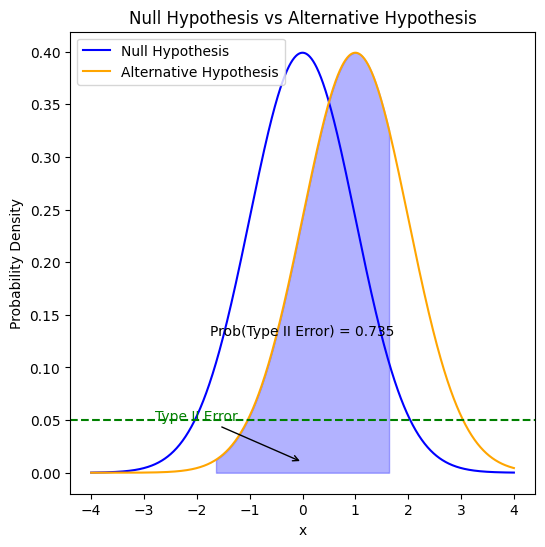

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate data for the normal distributions
x = np.linspace(-4, 4, 1000)
mu1 = 0
sigma1 = 1
mu2 = 1
sigma2 = 1

# Calculate the boundaries for the left subplot
boundary = 1.64
left_boundary = mu1 - sigma1 * boundary
right_boundary = mu1 + sigma1 * boundary

# calculate the probability of a type II error
p_type_2 = stats.norm.cdf(right_boundary, mu2, sigma2) - stats.norm.cdf(left_boundary, mu2, sigma2)

# Create the figure and subplot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the right subplot
ax.plot(x, stats.norm.pdf(x, mu1, sigma1), color='blue', label='Null Hypothesis')
ax.plot(x, stats.norm.pdf(x, mu2, sigma2), color='orange', label='Alternative Hypothesis')
ax.fill_between(x, stats.norm.pdf(x, mu2, sigma2), where=(x >= left_boundary) & (x <= right_boundary), color='blue', alpha=0.3)
ax.axhline(0.05, color='green', linestyle='--')

## add legend for type II error
ax.annotate('Type II Error', xy=(0, 0.01), xytext=(-2, 0.05),
             arrowprops=dict(facecolor='green', arrowstyle='->'), color='green', ha='center')
## add text for probability of type II error in the center of the plot, in black
ax.text(0, 0.13, 'Prob(Type II Error) = {:.3f}'.format(p_type_2), color='black', ha='center')

## add vertical line inside boundary


ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
ax.set_title('Null Hypothesis vs Alternative Hypothesis')

# Add legend to the subplot
ax.legend()

# Show the figure
plt.show()


#### Calculating Power


Power is defined as : $1 - \beta$

It is anything outside of the confidence interval. Let's take a look.



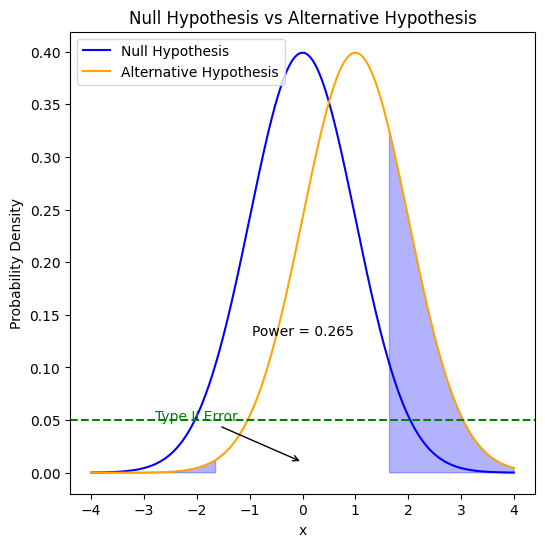

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate data for the normal distributions
x = np.linspace(-4, 4, 1000)
mu1 = 0
sigma1 = 1
mu2 = 1
sigma2 = 1

# Calculate the boundaries for the left subplot
boundary = 1.64
left_boundary = mu1 - sigma1 * boundary
right_boundary = mu1 + sigma1 * boundary

# calculate the probability of a type II error
p_type_2 = stats.norm.cdf(right_boundary, mu2, sigma2) - stats.norm.cdf(left_boundary, mu2, sigma2)

# Create the figure and subplot
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the right subplot
ax.plot(x, stats.norm.pdf(x, mu1, sigma1), color='blue', label='Null Hypothesis')
ax.plot(x, stats.norm.pdf(x, mu2, sigma2), color='orange', label='Alternative Hypothesis')
ax.fill_between(x, stats.norm.pdf(x, mu2, sigma2), where=(x <= left_boundary) | (x >= right_boundary), color='blue', alpha=0.3)
ax.axhline(0.05, color='green', linestyle='--')

## add legend for type II error
ax.annotate('Type II Error', xy=(0, 0.01), xytext=(-2, 0.05),
             arrowprops=dict(facecolor='green', arrowstyle='->'), color='green', ha='center')
## add text for probability of type II error in the center of the plot, in black
ax.text(0, 0.13, 'Power = {:.3f}'.format(1-p_type_2), color='black', ha='center')

## add vertical line inside boundary


ax.set_xlabel('x')
ax.set_ylabel('Probability Density')
ax.set_title('Null Hypothesis vs Alternative Hypothesis')

# Add legend to the subplot
ax.legend()

# Show the figure
plt.show()

### Notes on Power

- Power goes up as $alpha$ goes up. 
  >This is because the rejection region gets bigger, so it's easier to reject the null hypothesis.

- Power goes up as the sample size goes up. 
  >This is because the confidence region gets smaller, so it's easier to reject the null hypothesis.

- Power goes up as the $\mu_1$ gets further away from $\mu_0$. 
  >This our alternative distribution gets further away from our null distribution, so it's easier to reject the null hypothesis.


Let's see this in action.


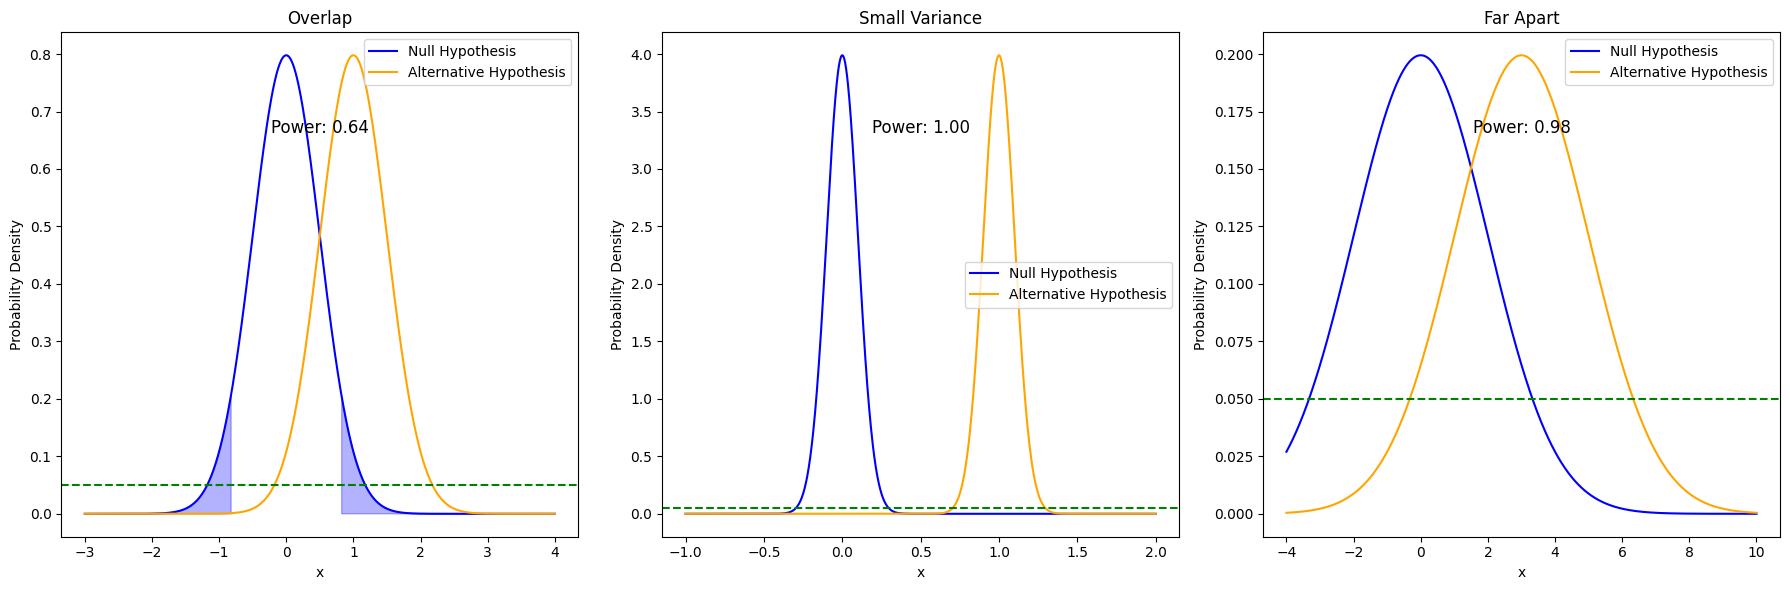

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate data for the normal distributions

mu1 = 0
sigma1 = 0.5


# Calculate the boundaries for the left subplot
boundary = 1.64
left_boundary = mu1 - sigma1 * boundary
right_boundary = mu1 + sigma1 * boundary

# Create the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

x = np.linspace(-3, 4, 1000)
mu2 = 1
sigma2 = 0.5

# Plot the left subplot
ax1.plot(x, stats.norm.pdf(x, mu1, sigma1), color='blue', label='Null Hypothesis')
ax1.plot(x, stats.norm.pdf(x, mu2, sigma2), color='orange', label='Alternative Hypothesis')
ax1.fill_between(x, stats.norm.pdf(x, mu1, sigma1), where=(x <= left_boundary) | (x >= right_boundary), color='blue', alpha=0.3)
ax1.axhline(0.05, color='green', linestyle='--')
ax1.set_xlabel('x')
ax1.set_ylabel('Probability Density')
ax1.set_title('Overlap')

# Calculate power for the left subplot
power1 = 1 - stats.norm.cdf(right_boundary, mu2, sigma2) + stats.norm.cdf(left_boundary, mu2, sigma2)
ax1.annotate(f"Power: {power1:.2f}", xy=(0.5, 0.8), xycoords='axes fraction', fontsize=12, ha='center')

########

mu1 = 0
sigma1 = 0.1

x = np.linspace(-1, 2, 1000)
mu2 = 1
sigma2 = 0.1

# Calculate the boundaries for the left subplot
boundary = 1.64
left_boundary = mu1 - sigma1 * boundary
right_boundary = mu1 + sigma1 * boundary

# Plot the center subplot
ax2.plot(x, stats.norm.pdf(x, mu1, sigma1), color='blue', label='Null Hypothesis')
ax2.plot(x, stats.norm.pdf(x, mu2, sigma2), color='orange', label='Alternative Hypothesis')
ax2.axhline(0.05, color='green', linestyle='--')
ax2.set_xlabel('x')
ax2.set_ylabel('Probability Density')
ax2.set_title('Small Variance')

# Calculate power for the center subplot
power2 = 1 - stats.norm.cdf(right_boundary, mu2, sigma2/10) + stats.norm.cdf(left_boundary, mu2, sigma2/10)
ax2.annotate(f"Power: {power2:.2f}", xy=(0.5, 0.8), xycoords='axes fraction', fontsize=12, ha='center')

########

mu1 = 0
sigma1 = 2

x = np.linspace(-4, 10, 1000)
mu2 = 3
sigma2 = 2

# Plot the right subplot
ax3.plot(x, stats.norm.pdf(x, mu1, sigma1), color='blue', label='Null Hypothesis')
ax3.plot(x, stats.norm.pdf(x, mu2, sigma2), color='orange', label='Alternative Hypothesis')
ax3.axhline(0.05, color='green', linestyle='--')
ax3.set_xlabel('x')
ax3.set_ylabel('Probability Density')
ax3.set_title('Far Apart')

# Calculate power for the right subplot
power3 = 1 - stats.norm.cdf(right_boundary, mu2, sigma2) + stats.norm.cdf(left_boundary, mu2, sigma2)
ax3.annotate(f"Power: {power3:.2f}", xy=(0.5, 0.8), xycoords='axes fraction', fontsize=12, ha='center')

# Add legend to the subplots
ax1.legend()
ax2.legend()
ax3.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()



### The Effect Size

The effect size is the difference between the null hypothesis and the alternative hypothesis divided by the standard deviation.

The effect size is usually denoted by $\delta$ and is defined as:

$$\delta = \frac{\mu_1 - \mu_0}{\sigma_1}$$

The effect size is a measure of how far apart the null hypothesis and the alternative hypothesis are in terms of standard deviations.

The effect size is used to calculate the power of a test.


### Informing Decisions - Power Curves

Now that we know how  to calculate power, we can use it to inform our decisions about hypothesis testing. Previously, in the context of hypothesis testing, we considered one alternative hypothesis at a time. But, in reality, there are many possible alternative hypotheses. An infinite amount even.

So, we might want to consider the power of our test for a range of alternative hypotheses. As a way to spot trends and make decisions about our hypothesis testing.

To do this, we plot the power of our test against one of the parameters of our alternative hypothesis. This is called a power curve.






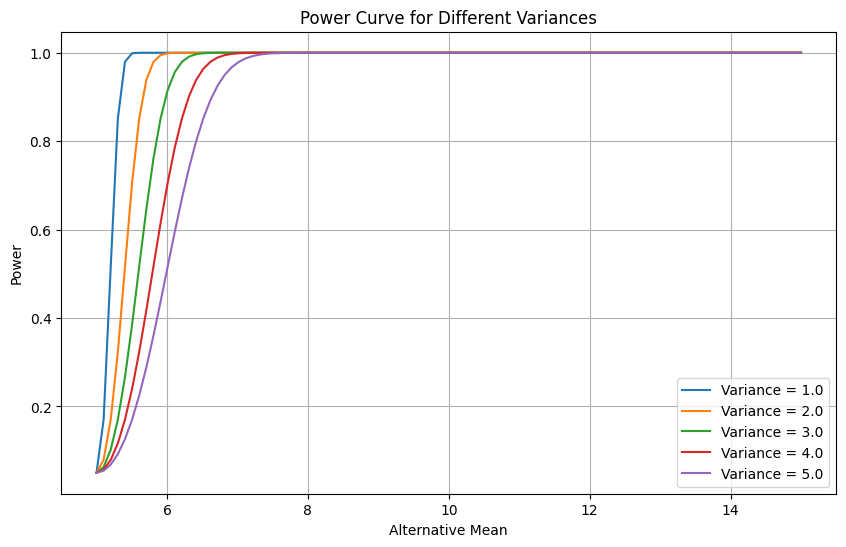

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.power as smp

# Null distribution parameters
null_mean = 5
null_std = 4

# Alternative distribution parameters
alternative_means = np.linspace(5, 15, 100)
alternative_stds = np.linspace(1, 5, 5)  # Specify the different variances

# Calculate power for each alternative mean and variance using statsmodels
power = []
sample_size = 100  # Specify the sample size
for alternative_mean in alternative_means:
    for alternative_std in alternative_stds:
        effect_size = (alternative_mean - null_mean) / alternative_std
        power.append(smp.TTestPower().power(effect_size=effect_size, nobs=sample_size, alpha=0.05, alternative='two-sided'))

# Reshape the power list to match the dimensions of the alternative_means and alternative_stds
power = np.array(power).reshape(len(alternative_means), len(alternative_stds))


# set figure size
plt.figure(figsize=(10, 6))
# Plot the power curves for different variances
for i, alternative_std in enumerate(alternative_stds):
    plt.plot(alternative_means, power[:, i], label=f'Variance = {alternative_std}')

plt.xlabel('Alternative Mean')
plt.ylabel('Power')
plt.title('Power Curve for Different Variances')
plt.legend()
plt.grid(True)
plt.show()

### Python TTestIndPower

Let's take a look at how to calculate power in Python.

We'll use the `statsmodels` library to calculate power.

We'll use the `statsmodels.stats.power` module.

We'll use the `TTestIndPower` class to calculate power for a two-sample t-test.



In [63]:
from statsmodels.stats.power import TTestIndPower

mu0 = 0
mu1 = 0.5
std = 1
n = 100
alpha = 0.05

effect_size = (mu1 - mu0) / std

power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=n, alpha=alpha)

print(power)

0.9404271933839895


#### Estimating Sample Size Using Power

In some cases, we may want to estimate the sample size needed to achieve a desired level of power for a hypothesis test. Power analysis can help us determine the appropriate sample size to detect a meaningful effect size with a desired level of confidence.

We can use the `solve_power` method of the `TTestIndPower` class from the `statsmodels.stats.power` module to estimate the sample size needed.

To estimate the sample size, we need to specify the following parameters:

- `effect_size`: The standardized effect size we want to detect. This can be the expected difference in means divided by the standard deviation.
- `alpha`: The significance level (e.g., 0.05 for a 5% level of significance).
- `power`: The desired level of power (e.g., 0.8 for 80% power).
- `ratio`: The ratio of the sample sizes in the two groups (e.g., 1 for equal sample sizes).
- `alternative`: The alternative hypothesis ('two-sided', 'larger', or 'smaller').

Here's an example code snippet that demonstrates how to estimate the sample size needed using power:


In [64]:
import statsmodels.stats.power as smp

effect_size = 0.5
alpha = 0.05
power = 0.8
ratio = 1
alternative = 'two-sided'

sample_size = smp.TTestIndPower().solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio, alternative=alternative)

print(f"The estimated sample size needed is {sample_size:.0f}")


The estimated sample size needed is 64


### Summary

- Power is the probability of rejecting the null hypothesis when the null hypothesis is indeed FALSE. In other words, power is the probability of correctly rejecting the null hypothesis.

- Power is calculated as 1 - the probability of a Type II error.

- all you need to calculate power (in a normal setting) is the **effect size** and the sample size.

- use the `TTestPower()` function from `statsmodels.stats.power` to calculate power.